In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic_df = pd.read_csv(r'C:\jupyter_home\ML\titanic\train.csv')
print('titanic_df type :', type(titanic_df))
titanic_df.head()

titanic_df type : <class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
print('DataFrame 크기:',titanic_df.shape)

DataFrame 크기: (891, 12)


In [5]:
print("\n ###### 학습 데이터 정보 ###### \n")
titanic_df.info()


 ###### 학습 데이터 정보 ###### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Null 값 처리  
사이킷런 머신러닝 알고리즘 null값을 허용하지 않으므로  
DataFrame의 fillna() 함수를 이용해 Null 값을 평균 또는 고정값으로 변경.

In [6]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 개수 :', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수 : 0


In [7]:
print('Sex 값 분포 \n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 \n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 \n', titanic_df['Embarked'].value_counts())

Sex 값 분포 
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


### Cabin 속성 정리

In [8]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print('\n Cabin 값 분포 \n', titanic_df['Cabin'].value_counts())


 Cabin 값 분포 
 N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64


### 성별에 따른 생존자수 비교

In [9]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

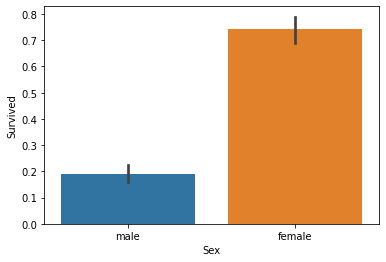

In [10]:
sns.barplot(x='Sex', y = 'Survived', data=titanic_df)

여성의 생존률이 현격히 높음

# 부에 따른 생존 확률
객실 등급에 따라 부를 예측. 성별과 함께 고려

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

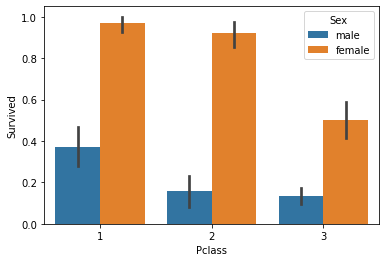

In [11]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

# 나이에 따른 생존확률

In [12]:
def get_category(age):
    cat = ''
    if age <= -1 : cat = 'Unknown'
    elif age <= 5 : cat = 'Baby'
    elif age <= 12 : cat = 'Child'
    elif age <= 18 : cat = 'Teenager'
    elif age <= 25 : cat = 'Student'
    elif age <= 35 : cat = 'Young Adult'
    elif age <= 60 : cat = 'Adult'
    else : cat = 'Elderly'

    return cat



group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정.
# get_category(X)는 입력값으로 Age 칼럼을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
titanic_df.groupby(['Age_cat', 'Sex', 'Survived'])['Survived'].count()

Age_cat      Sex     Survived
Adult        female  0            16
                     1            54
             male    0           101
                     1            24
Baby         female  0             5
                     1            16
             male    0             8
                     1            15
Child        female  0             8
                     1             3
             male    0             8
                     1             6
Elderly      female  1             3
             male    0            17
                     1             2
Student      female  0            13
                     1            41
             male    0            95
                     1            13
Teenager     female  0             9
                     1            27
             male    0            31
                     1             3
Young Adult  female  0            30
                     1            89
             male    0           208
        

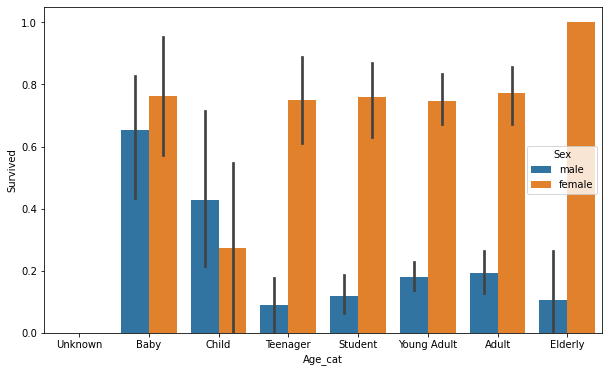

In [13]:
# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10,6))

sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [14]:
from sklearn import preprocessing

def encode_feature(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features :
        le = preprocessing.LabelEncoder()
        le = le.fit((dataDF[feature]))
        dataDF[feature] = le.transform(dataDF[feature])

    return  dataDF

titanic_df = encode_feature(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [15]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int32  
 11  Embarked     891 non-null    int32  
dtypes: float64(2), int32(3), int64(5), object(2)
memory usage: 73.2+ KB


# 좌석 클래스별 가격

In [16]:
titanic_df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [17]:
titanic_df['Pclass'].dtype

dtype('int64')

In [18]:
for i in range(1,4,1) :
    fare = titanic_df[titanic_df['Pclass']==i]["Fare"]
    print()
    ave = fare.mean()
    print("{0} Class Average Fare : {1}".format(i, ave))
    print("{} Class Standard Deviation : {}".format(i, fare.std()))

## 동일
titanic_df[['Fare','Pclass']].groupby('Pclass').mean()


1 Class Average Fare : 84.15468749999992
1 Class Standard Deviation : 78.38037264672884

2 Class Average Fare : 20.66218315217391
2 Class Standard Deviation : 13.417398756149332

3 Class Average Fare : 13.675550101832997
3 Class Standard Deviation : 11.7781417043873


,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [19]:
titanic_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [20]:
titanic_df['Fare'] = titanic_df['Fare'] // 10

In [21]:
len(titanic_df[titanic_df["Fare"]>=10]["Pclass"])

53

In [22]:
len(titanic_df[titanic_df["Pclass"]==1].index)

216

1st Class 216명 인원중에 53명의 요금이 상대적으로 너무 크다
그 53명의 생존률은 크게 다르지 않음

In [23]:
titanic_df[titanic_df['Pclass']==2]['Fare'].unique()

array([3., 1., 2., 4., 7., 0., 6.])

C:\ProgramData\Anaconda3\envs\machine\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

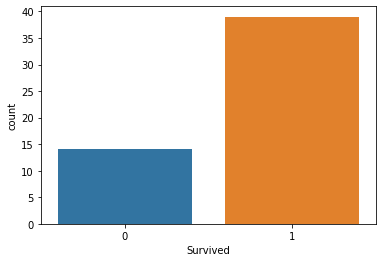

In [24]:
tt=titanic_df[titanic_df['Fare']>=10]['Survived']
sns.countplot(tt)

C:\ProgramData\Anaconda3\envs\machine\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

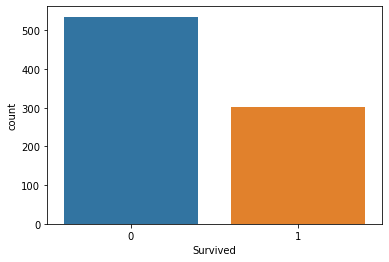

In [25]:
tt=titanic_df[titanic_df['Fare']<10]['Survived']
sns.countplot(tt)

C:\ProgramData\Anaconda3\envs\machine\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

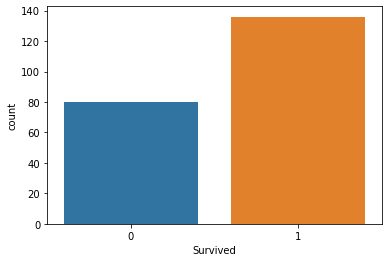

In [26]:
tt=titanic_df[titanic_df['Pclass']==1]['Survived']
sns.countplot(tt)

In [27]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,0.0,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,7.0,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,0.0,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,5.0,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,0.0,7,3
